$\color{blue}{\huge {\text{2. The Mathematical Building Blocks of Neural Networks}}}$

<h3><span style="color:black">2.1 A First Look at a Neural Network (solving MNIST using Keras)</span></h3>

Let’s look at a concrete example of a neural network that uses the Python library Keras to learn to classify handwritten digits.

In [23]:
# 2.1 Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<code>train_images</code> and <code>train_labels</code> form the training set, the data that the model will learn from. The model will then be tested on the test set, <code>test_images</code> and <code>test_labels</code>.

In [24]:
# Let's look at the training data:
print("Train images shape =", train_images.shape)
print("Length of train labels =", train_labels)
print("The train labels:", train_labels)

# Here's the test data:
print("The shape of the test images =",test_images.shape)
print("The length of the test labels =", len(test_labels))
print("The test labels: ", test_labels)

Train images shape = (60000, 28, 28)
Length of train labels = [5 0 4 ... 5 6 8]
The train labels: [5 0 4 ... 5 6 8]
The shape of the test images = (10000, 28, 28)
The length of the test labels = 10000
The test labels:  [7 2 1 ... 4 5 6]


The workflow will be as follows: First, we’ll feed the neural network the training data, <code>train_images</code> and <code>train_labels</code>. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for <code>test_images</code>, and we’ll verify whether these predictions match the labels from <code>test_labels</code>.

In [25]:
# 2.2 The network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the $\color{blue}{\textit {layer}}$. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract <i><span style="color:blue">representations</span></i> out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive <i><span style="color:blue">data distillation</span></i>. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.<br><br>
To make the model ready for training, we need to pick three more things, as part of the <i><span style="color:blue">compilation</span></i> step:<br>
• <i><span style="color:blue">An optimizer</span></i>—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.<br>
• <i><span style="color:blue">A loss function</span></i>—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.<br>
• <i><span style="color:blue">Metrics to monitor during training and testing—</span></i>Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [26]:
# 2.3 The compliation step
model.compile(optimizer="rmsprop",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval.

In [27]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

We’re now ready to train the model, which in Keras is done via a call to the model’s <code>fit()</code>method—we <i><span style="color:blue">fit</span></i> the model to its training data:

In [28]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
 11/469 [..............................] - ETA: 2s - loss: 1.2717 - accuracy: 0.6087  

2021-09-05 14:28:02.051613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 5ms/step - loss: 0.2582 - accuracy: 0.9245

Now that we have a trained model, you can use it to predict class probabilities for <i><span style="color:blue">new</span></i> digits—images that weren’t part of the training data, like those from the test set:

Each number of index i in that array corresponds to the probability that digit image <code>test_digits[0]</code> belong to class <code>i</code>.<br><br>
This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [29]:
# 2.6 Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] # the highest score is at index 7

2021-09-05 14:28:13.619703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([7.2812803e-08, 1.6268238e-10, 1.6110451e-06, 2.3445358e-05,
       1.8444876e-11, 2.0505810e-08, 3.2602451e-14, 9.9997401e-01,
       1.5403860e-07, 6.9725036e-07], dtype=float32)

In [30]:
# Checking to see if the first digit is a 7:
predictions[0].argmax()
predictions[0][7]

0.999974

We can check that the test label agrees:

In [31]:
test_labels[0]

7

On average, how good is our model at classifying such never-seen-before digits? Let’s check by computing average accuracy over the entire test set.

In [32]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}") # test_acc: 0.9808000326156616

 36/313 [==>...........................] - ETA: 0s - loss: 0.0702 - accuracy: 0.9766 

2021-09-05 14:28:13.685373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9791

<h3><span style="color:black">2.2 Data Representations for Neural Networks</span></h3>

#### 2.21 Scalars (rank-0 tensors)
A tensor that contains only one number is called a <i>scalar</i> (or scalar tensor, or rank-0 tensor, or 0D tensor). In NumPy, a <code>float32</code> or <code>float64</code> number is a scalar tensor (or scalar array). You can display the number of axes of a NumPy tensor via the <code>ndim</code> attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its <i>rank</i>. Here’s a NumPy scalar:

In [33]:
import numpy as np
x = np.array(12)
print("x =",x) # x = 12
print("The dimensions of x =",x.ndim) # dimension = 0

x = 12
The dimensions of x = 0


#### 2.2.2 Vectors (rank-1 tensors)
An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis.

In [34]:
x = np.array([12, 3, 6, 14, 7])
print("x = ", x)
print("The dimensions of x = ",x.ndim)

x =  [12  3  6 14  7]
The dimensions of x =  1


A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis).

#### 2.2.3 Matrices (rank-2 tensors)

An array of vectors is a <i>matrix</i>, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to <i>rows</i> and <i>columns</i>).

In [35]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 24, 1],
             [7, 80, 4, 36, 2]])
print("x =", x)
print("The dimensions of x =", x.ndim) # x = 2

x = [[ 5 78  2 34  0]
 [ 6 79  3 24  1]
 [ 7 80  4 36  2]]
The dimensions of x = 2


#### 2.2.4 Rank-3 tensors and higher–rank tensors

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers.

In [36]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
             [[5, 78, 3, 35, 1],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])
print("x = ", x)
print("The dimensions of x = ", x.ndim) # 3

x =  [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  3 35  1]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
The dimensions of x =  3


#### 2.2.5 Key attributes of tensors

A tensor is defined by three key attributes:

• <i><span style="color:blue">Number of axes (rank)</i><span>—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.<br>
• <i><span style="color:blue">Shape</i><span>—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().<br>
• <i><span style="color:blue">Data type</i><span>(usually called <code>dtype</code> in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:

In [37]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the number of axes of the tensor train_images, the ndim attribute:

In [38]:
train_images.ndim

3

Here is the shape:

In [39]:
print(train_images.shape)

(60000, 28, 28)


And this is the data type, the dtype attribute:

In [40]:
print(train_images.dtype)

uint8


So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

Let’s display the fourth digit in this rank-3 tensor, using the library Matplotlib (part of the standard scientific Python suite); see figure 2.2.

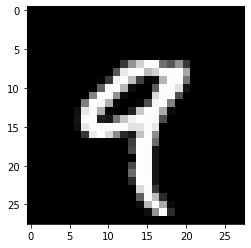

In [41]:
# How to display an image in a Jupyter notebook:
import matplotlib.pyplot as plt
digit = train_images[4]
digit = digit.reshape((28, 28))
plt.imshow(digit,cmap='gray')
plt.show() # it's a nine :)

In [42]:
# Confirm that the fourth image is a nine:
train_labels[4]

9

#### 2.2.6 Tensors slicing in NumPy
The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [43]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

#### 2.2.7 The Notion of Data Batches
In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension). In the MNIST example, "samples" are images of digits.
<br><br>In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:

In [44]:
batch = train_images[:128]
# here's the next batch:
batch = train_images[128:256]
# and the nth batch:
n = 3
batch = train_images[128 * n:128 * (n+1)]

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

#### 2.2.8 Real–world examples of data tensors
• <i><span style="color:blue">Vector data</span></i>—rank-2 tensors of shape (samples, features) where each samples is a vector of numerical attributes ("features).<br>
• <i><span style="color:blue">Timeseries data or sequence data</span></i>—rank-3 tensors of shape (samples, timesteps, freatures), where each sample is a sqeuence (of length timesteps) of feature vectors.<br>
• <i><span style="color:blue">Images</i>—rank-4 tensors of shape (samples, height, width, channels) where each sample is a 2D grid of pixels, and each pixle is represented by a vector of values ("channels")<br>
• <i><span style="color:blue">Video</i>—rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images.

#### 2.2.9 Vector data

In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a rank-2 tensor (that is, an array of vectors), where the first axis is the <i><span style="color:blue">samples axis</span></i> and the second axis is the <i><span style="color:blue">features axis</span></i>.

Let's look at two examples:<br>
• An actuarial dataset of people, where we consider each person’s age, gender, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).
<br>• A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

#### 2.2.10 How Timeseries Data or Sequence Data Are Stored
Each sample can be encoded as a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a rank-3 tensor (see figure 2.3).

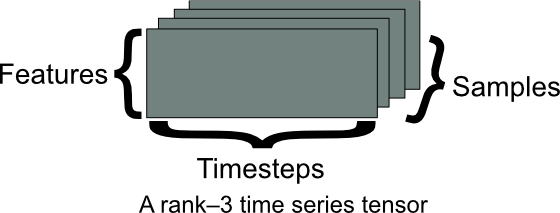

In [54]:
from IPython.display import Image
Image(filename= "Untitled_01.png", height=164, width=560)